In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('amazon_products_sales_data_uncleaned.csv')


**Data Understanding**

In [3]:
df.head()

,title,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_best_seller,is_sponsored,is_couponed,buy_box_availability,delivery_details,sustainability_badges,image_url,product_url,collected_at
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6 out of 5 stars,375,300+ bought in past month,89.68,basic variant price: 2.4GHz,$159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,"Delivery Mon, Sep 1",Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3 out of 5 stars,"2,457",6K+ bought in past month,9.99,basic variant price: nan,$15.99,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Fri, Aug 29",NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6 out of 5 stars,"3,044",2K+ bought in past month,314.00,basic variant price: nan,$349.00,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6 out of 5 stars,"35,882",10K+ bought in past month,NaN,basic variant price: $162.24,No Discount,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,/Apple-Cancellation-Transparency-Personalized-...,2025-08-21 11:14:29
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8 out of 5 stars,"28,988",10K+ bought in past month,NaN,basic variant price: $72.74,No Discount,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,/Apple-MX542LL-A-AirTag-Pack/dp/B0D54JZTHY/ref...,2025-08-21 11:14:29


In [4]:
print(df.columns)

Index(['title', 'rating', 'number_of_reviews', 'bought_in_last_month',
       'current/discounted_price', 'price_on_variant', 'listed_price',
       'is_best_seller', 'is_sponsored', 'is_couponed', 'buy_box_availability',
       'delivery_details', 'sustainability_badges', 'image_url', 'product_url',
       'collected_at'],
      dtype='object')


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     42675 non-null  object
 1   rating                    41651 non-null  object
 2   number_of_reviews         41651 non-null  object
 3   bought_in_last_month      39458 non-null  object
 4   current/discounted_price  30926 non-null  object
 5   price_on_variant          42675 non-null  object
 6   listed_price              42675 non-null  object
 7   is_best_seller            42675 non-null  object
 8   is_sponsored              42675 non-null  object
 9   is_couponed               42675 non-null  object
 10  buy_box_availability      28022 non-null  object
 11  delivery_details          30955 non-null  object
 12  sustainability_badges     3408 non-null   object
 13  image_url                 42675 non-null  object
 14  product_url           

In [6]:
print(df.isna().sum())

title                           0
rating                       1024
number_of_reviews            1024
bought_in_last_month         3217
current/discounted_price    11749
price_on_variant                0
listed_price                    0
is_best_seller                  0
is_sponsored                    0
is_couponed                     0
buy_box_availability        14653
delivery_details            11720
sustainability_badges       39267
image_url                       0
product_url                  2069
collected_at                    0
dtype: int64


In [7]:
df.describe()

,title,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_best_seller,is_sponsored,is_couponed,buy_box_availability,delivery_details,sustainability_badges,image_url,product_url,collected_at
count,42675,41651,41651,39458,30926,42675,42675,42675,42675,42675,28022,30955,3408,42675,40606,42675
unique,8808,31,4413,59,2576,3466,911,12,2,42,1,298,16,8038,40606,1559
top,"Duracell Coppertop 9V Battery, 6 Count (Pack o...",4.6 out of 5 stars,25,100+ bought in past month,29.99,basic variant price: nan,No Discount,No Badge,Organic,No Coupon,Add to cart,"Delivery Mon, Sep 1",Small Business,https://m.media-amazon.com/images/I/51Xr76m2WL...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
freq,744,6151,626,8801,825,21031,30364,40814,35664,40727,28022,6189,1341,1461,1,33


In [8]:
df.columns = [
    'product_title', 'product_rating', 'total_reviews', 'purchased_last_month',
    'discounted_price', 'price_on_variant', 'original_price', 'is_best_seller',
    'is_sponsored', 'has_coupon', 'buy_box_availability', 'delivery_date',
    'sustainability_tags', 'product_image_url', 'product_page_url', 'data_collected_at'
]
print("New Column Names :")
df.columns

New Column Names :


Index(['product_title', 'product_rating', 'total_reviews',
       'purchased_last_month', 'discounted_price', 'price_on_variant',
       'original_price', 'is_best_seller', 'is_sponsored', 'has_coupon',
       'buy_box_availability', 'delivery_date', 'sustainability_tags',
       'product_image_url', 'product_page_url', 'data_collected_at'],
      dtype='object')

**Data Cleaning**

In [9]:
'''
from transformers import pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

def extract_product_name_hf(title):
    if pd.isna(title) or len(title) < 20:
        return title
    try:
        text = f"Product title: {title}"
        summary = summarizer(text, max_length=30, min_length=10, do_sample=False)
        result = summary[0]['summary_text'].replace('Product title:', '').strip()
        return result[:50]  
    except Exception as e:
        return title[:50] + "..." if len(title) > 50 else title

sample_df = df.head(5).copy()
sample_df['clean_product_name_hf'] = sample_df['product_title'].apply(extract_product_name_hf)
'''

'\nfrom transformers import pipeline\nsummarizer = pipeline("summarization", model="facebook/bart-large-cnn")\n\ndef extract_product_name_hf(title):\n    if pd.isna(title) or len(title) < 20:\n        return title\n    try:\n        text = f"Product title: {title}"\n        summary = summarizer(text, max_length=30, min_length=10, do_sample=False)\n        result = summary[0][\'summary_text\'].replace(\'Product title:\', \'\').strip()\n        return result[:50]  \n    except Exception as e:\n        return title[:50] + "..." if len(title) > 50 else title\n\nsample_df = df.head(5).copy()\nsample_df[\'clean_product_name_hf\'] = sample_df[\'product_title\'].apply(extract_product_name_hf)\n'

Clean 'product_rating' column and extract only the ratings

In [10]:
df['product_rating'] = df['product_rating'].str.extract(r'(\d+\.?\d*)')[0].astype(float)
df['product_rating'] = df['product_rating'].round(1)

Cleaning 'number_of_reviews' and adding 0 reviews to all NaN values.


In [11]:
df['total_reviews'] = df['total_reviews'].astype(str).str.replace(',', '').replace('nan', '0').astype(int)

Clean 'purchased_last_month' to extract only the numbers

In [12]:
df['purchased_last_month'] = df['purchased_last_month'].str.replace('K', '000').str.extract(r'(\d+)')[0].fillna(0).astype(int)

Cleaning discounted,original,variant price

In [13]:
df['discounted_price'] = df['discounted_price'].astype(str).str.extract(r'(\d+\.?\d*)')[0].fillna(0).astype(float)
df['price_on_variant'] = df['price_on_variant'].astype(str).str.extract(r'(\d+\.?\d*)')[0].fillna(0).astype(float)

In [14]:
df = df.dropna(subset=['original_price'])
df.loc[df['original_price'].str.contains('No Discount', na=False), 'original_price'] = df['discounted_price']
df['original_price'] = df['original_price'].str.extract(r'(\d+\.?\d*)')[0].astype(float)

In [15]:
df = df.dropna(subset=['original_price'])

Encode is_best_seller

In [16]:
df['is_best_seller'] = (df['is_best_seller'].str.contains('Best Seller', na=False)).astype(int)

Encode is_sponsored

In [17]:
df['is_sponsored'] = df['is_sponsored'].astype(str).str.contains('Sponsored', na=False).astype(int)

Extract key value from is_couponed

In [18]:
import re
df.loc[df['has_coupon'].str.contains(r'\d+%', na=False), 'has_coupon'] = df.loc[df['has_coupon'].str.contains(r'\d+%', na=False), 'has_coupon'].str.extract(r'(\d+)')[0] + '%'
df.loc[df['has_coupon'].str.contains(r'\$\d+', na=False), 'has_coupon'] = df.loc[df['has_coupon'].str.contains(r'\$\d+', na=False), 'has_coupon'].str.extract(r'\$(\d+\.?\d*)')[0]

df['has_coupon'] = df['has_coupon'].fillna(0)
df.loc[~df['has_coupon'].str.contains(r'(\d+%|\d+\.?\d*)', na=False), 'has_coupon'] = 0

/var/folders/35/h2vzj0092n76sg7z3vjwcv3r0000gn/T/ipykernel_47567/3249308841.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[~df['has_coupon'].str.contains(r'(\d+%|\d+\.?\d*)', na=False), 'has_coupon'] = 0


Encode 'buy_box_availability'

In [19]:
df['buy_box_availability'] = (df['buy_box_availability'].str.contains('Add to cart', na=False)).astype(int)

Extract date from from delivery_deate

In [20]:
df.head()

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,price_on_variant,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,product_image_url,product_page_url,data_collected_at
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375,300,89.68,2.40,159.00,0,1,15%,1,"Delivery Mon, Sep 1",Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457,6000,9.99,0.00,15.99,0,1,0,1,"Delivery Fri, Aug 29",NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044,2000,314.00,0.00,349.00,0,1,0,1,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
20,"Energizer AA Batteries Alkaline Power, 32 Coun...",4.8,61157,100000,16.95,16.78,19.98,0,0,0,1,"Delivery Fri, Aug 29",NaN,https://m.media-amazon.com/images/I/91-R5huHLn...,NaN,2025-08-21 11:14:29
22,"Amazon Basics Wood-Cased #2 Pencils, Pre-sharp...",4.8,54244,100000,9.89,8.87,14.33,0,0,0,1,"Delivery Fri, Aug 29",NaN,https://m.media-amazon.com/images/I/81qxJ-PgGL...,/AmazonBasics-Pre-sharpened-Wood-Cased-Pencils...,2025-08-21 11:14:29


Just check if it is sustainable or not

In [21]:
df['has_sustainability'] = (~df['sustainability_tags'].isna()).astype(int)

Drop product image url and product page url

In [22]:
df = df.drop(['product_image_url', 'product_page_url'], axis=1)

Extract date and time into 2 seperate columns

In [23]:
df['collected_date'] = pd.to_datetime(df['data_collected_at']).dt.date
df['collected_time'] = pd.to_datetime(df['data_collected_at']).dt.time

In [24]:
df = df.drop(['data_collected_at'], axis=1)

Drop sustainability_badges columns ; extract only date from delivery_day ; Drop original delivery date column

In [25]:
df = df.drop(['sustainability_tags'], axis=1)
df['delivery_day'] = df['delivery_date'].str.extract(r'(\d{1,2})')[0].astype(float)
df = df.drop(['delivery_date'], axis=1)

**Feature Engineering**

Add a final price column based on all metrics such as coupon, discount, original price

In [26]:
def calculate_final_price(discounted_price, coupon):
    if coupon == 0 or pd.isna(coupon):
        return discounted_price
    coupon_str = str(coupon)
    try:
        if '%' in coupon_str:
            # Percentage discount
            percentage = float(coupon_str.replace('%', ''))
            return max(0, discounted_price * (1 - percentage/100))
        else:
            # Fixed amount discount
            return max(0, discounted_price - float(coupon_str))
    except:
        return discounted_price

df['final_price'] = df.apply(lambda row: calculate_final_price(row['discounted_price'], row['has_coupon']), axis=1)
df[['discounted_price', 'has_coupon', 'final_price']].head()

,discounted_price,has_coupon,final_price
0,89.68,15%,76.228
1,9.99,0,9.990
2,314.00,0,314.000
20,16.95,0,16.950
22,9.89,0,9.890


Drop has_coupon as it is no more required

In [27]:
df = df.drop(['has_coupon'], axis=1)

Price tier categorization using quantile-based cutting

In [28]:
df['price_tier'] = pd.cut(df['final_price'], 
                         bins=[0, 25, 50, 100, float('inf')], 
                         labels=['Budget', 'Mid-Range', 'Premium', 'Luxury'],
                         include_lowest=True)

Extract month from collected_date and categorize into sales tiers

In [29]:
df['month_collected'] = pd.to_datetime(df['collected_date']).dt.month

In [30]:
df['sales_tier'] = pd.cut(df['purchased_last_month'], 
                         bins=[0, 100, 500, 2000, float('inf')], 
                         labels=['Low Sales', 'Medium Sales', 'High Sales', 'Blockbuster'],
                         include_lowest=True)

In [31]:
print("Price-based features created successfully!")
print(f"\nPrice tier distribution:")
print(df['price_tier'].value_counts())
print(f"\nSales tier distribution:")
print(df['sales_tier'].value_counts())
print(f"\nMonth collected distribution:")
print(df['month_collected'].value_counts().sort_index())

Price-based features created successfully!

Price tier distribution:
price_tier
Budget       4412
Luxury       3529
Mid-Range    2591
Premium      1779
Name: count, dtype: int64

Sales tier distribution:
sales_tier
Low Sales       5363
Medium Sales    4757
High Sales      1270
Blockbuster      921
Name: count, dtype: int64

Month collected distribution:
month_collected
8    12311
Name: count, dtype: int64


In [32]:
df[['final_price', 'price_tier', 'purchased_last_month', 'sales_tier', 'month_collected']].head()

,final_price,price_tier,purchased_last_month,sales_tier,month_collected
0,76.228,Premium,300,Medium Sales,8
1,9.990,Budget,6000,Blockbuster,8
2,314.000,Luxury,2000,High Sales,8
20,16.950,Budget,100000,Blockbuster,8
22,9.890,Budget,100000,Blockbuster,8


Calculate Customer Review Metrics

In [33]:
df['reviews_per_purchase'] = df['total_reviews'] / df['purchased_last_month'].replace(0, np.nan)
df['reviews_per_purchase'] = df['reviews_per_purchase'].fillna(0)

print(f"\n\t\tReviews per purchase statistics:")
print(df['reviews_per_purchase'].describe())


		Reviews per purchase statistics:
count    12311.000000
mean         8.397463
std         28.629861
min          0.000000
25%          0.340000
50%          1.890000
75%          7.300000
max       1613.540000
Name: reviews_per_purchase, dtype: float64


In [34]:
df[['total_reviews', 'purchased_last_month', 'reviews_per_purchase']].head(10)

,total_reviews,purchased_last_month,reviews_per_purchase
0,375,300,1.250000
1,2457,6000,0.409500
2,3044,2000,1.522000
20,61157,100000,0.611570
22,54244,100000,0.542440
25,43002,70000,0.614314
26,125404,80000,1.567550
33,36122,70000,0.516029
35,44109,10000,4.410900
37,103375,10000,10.337500


**Final Tasks**

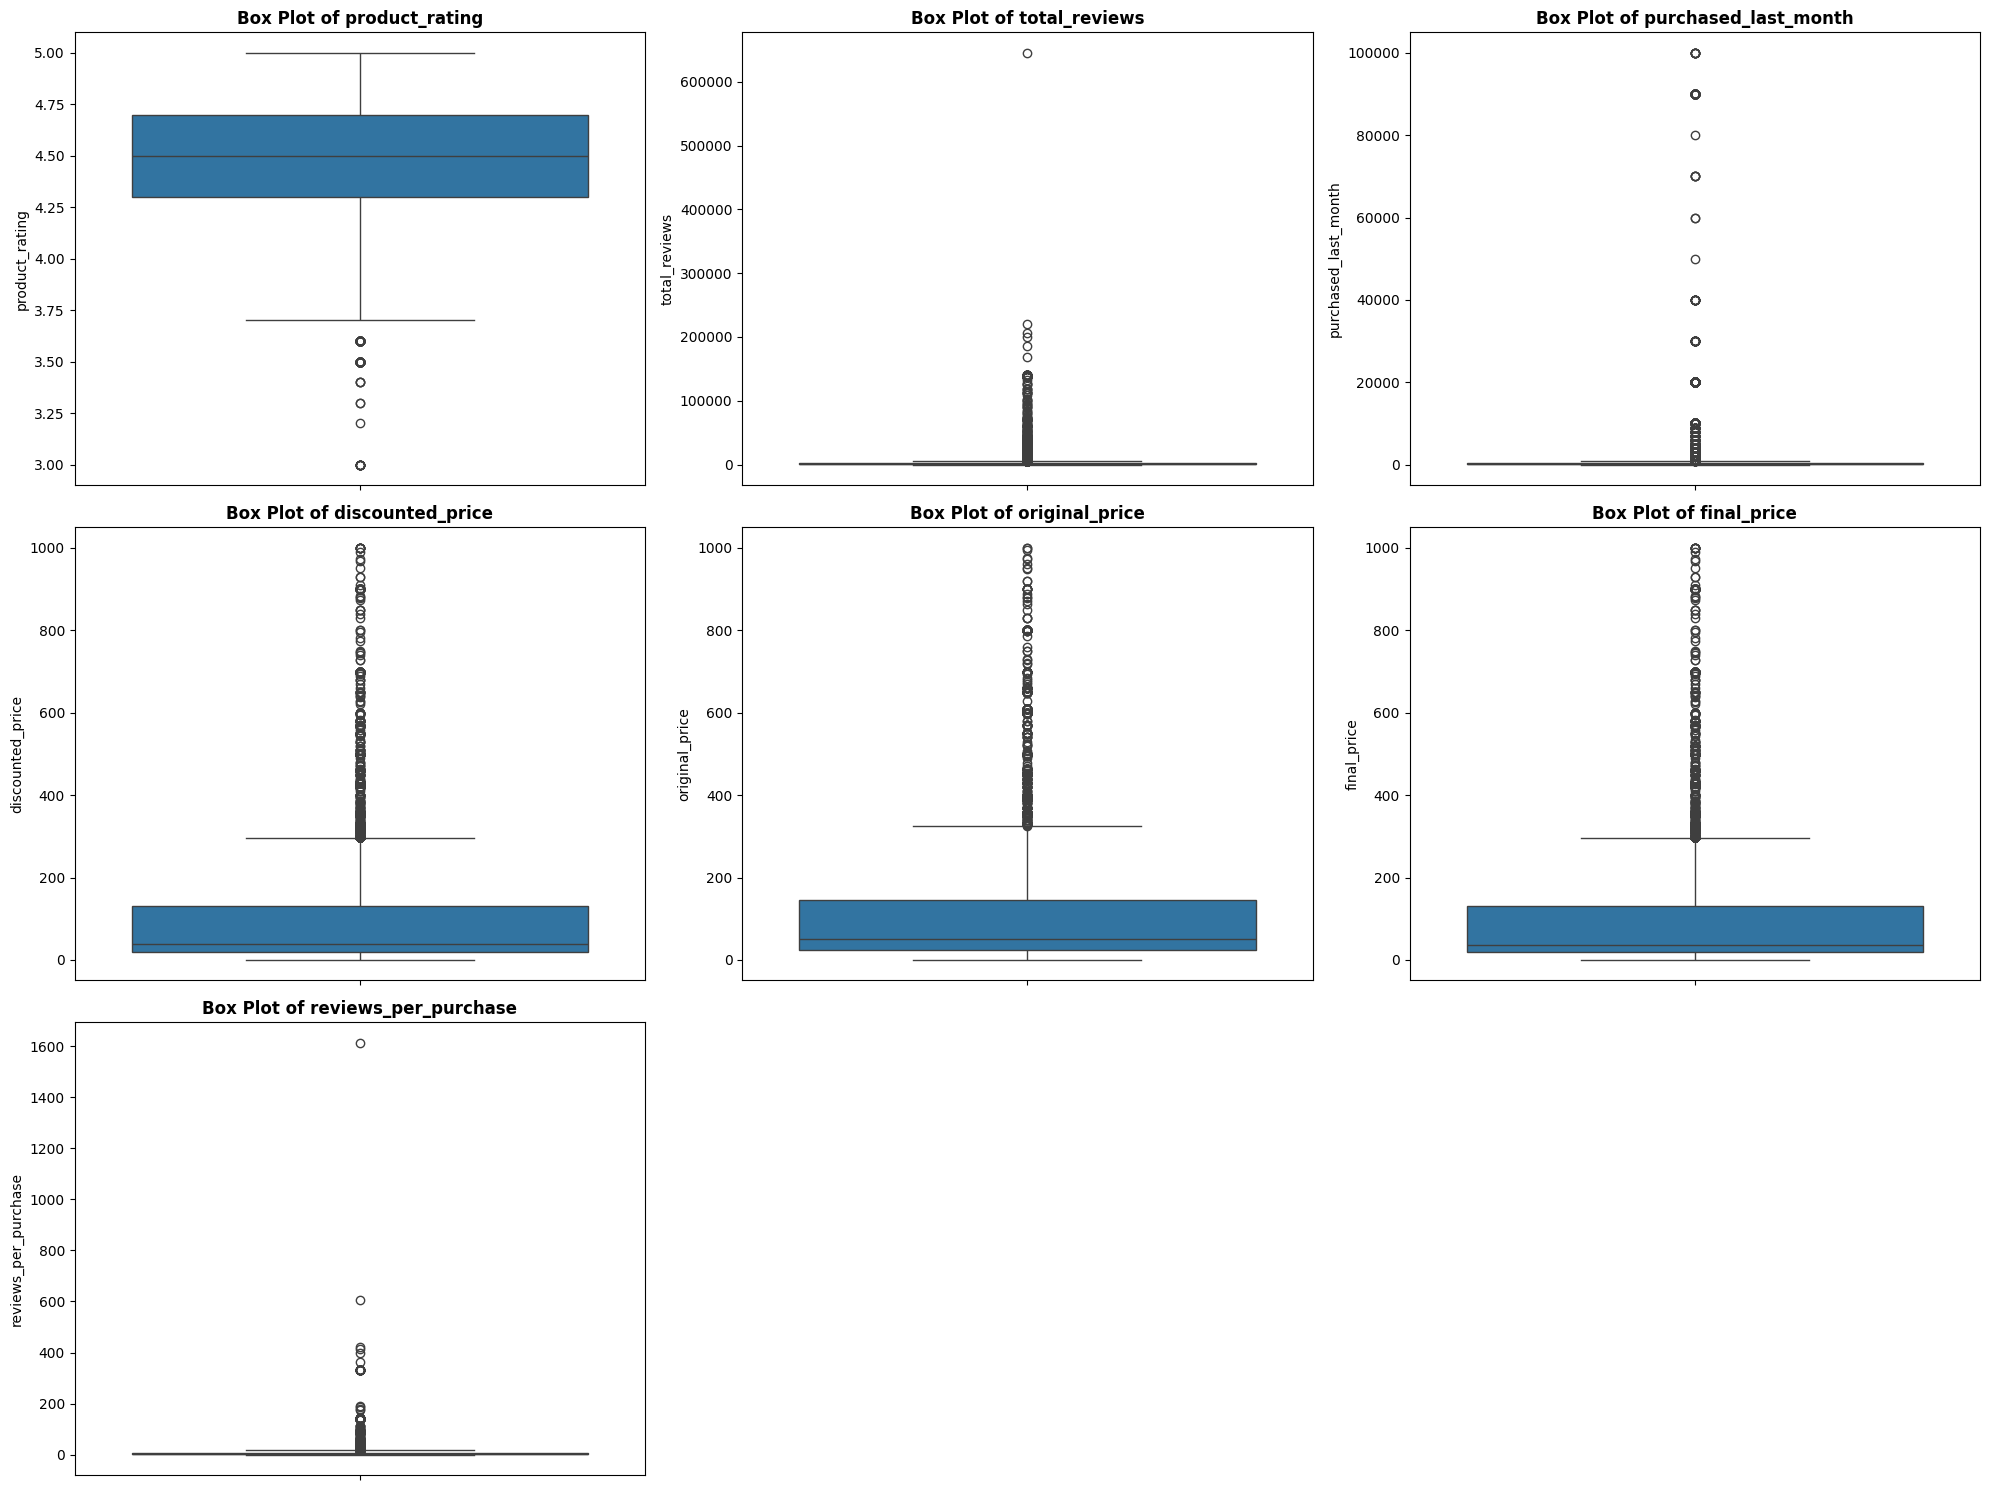

In [35]:
numerical_cols = [
    'product_rating', 'total_reviews', 'purchased_last_month', 
    'discounted_price', 'original_price', 'final_price', 'reviews_per_purchase'
]

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}', fontweight='bold')
plt.tight_layout()
plt.show()

In [36]:
df_cleaned = df.copy()

In [37]:
df_cleaned = df.copy()
critical_cols = ['final_price', 'total_reviews', 'purchased_last_month'] 

for col in critical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(f"Rows after selective outlier removal: {len(df_cleaned)}")

Rows after selective outlier removal: 8578


/var/folders/35/h2vzj0092n76sg7z3vjwcv3r0000gn/T/ipykernel_47567/3700088511.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cleaned['product_rating'].round(1), palette='viridis')
/var/folders/35/h2vzj0092n76sg7z3vjwcv3r0000gn/T/ipykernel_47567/3700088511.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='sales_tier', data=df_cleaned, order=df_cleaned['sales_tier'].value_counts().index, palette='plasma')
/var/folders/35/h2vzj0092n76sg7z3vjwcv3r0000gn/T/ipykernel_47567/3700088511.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.c

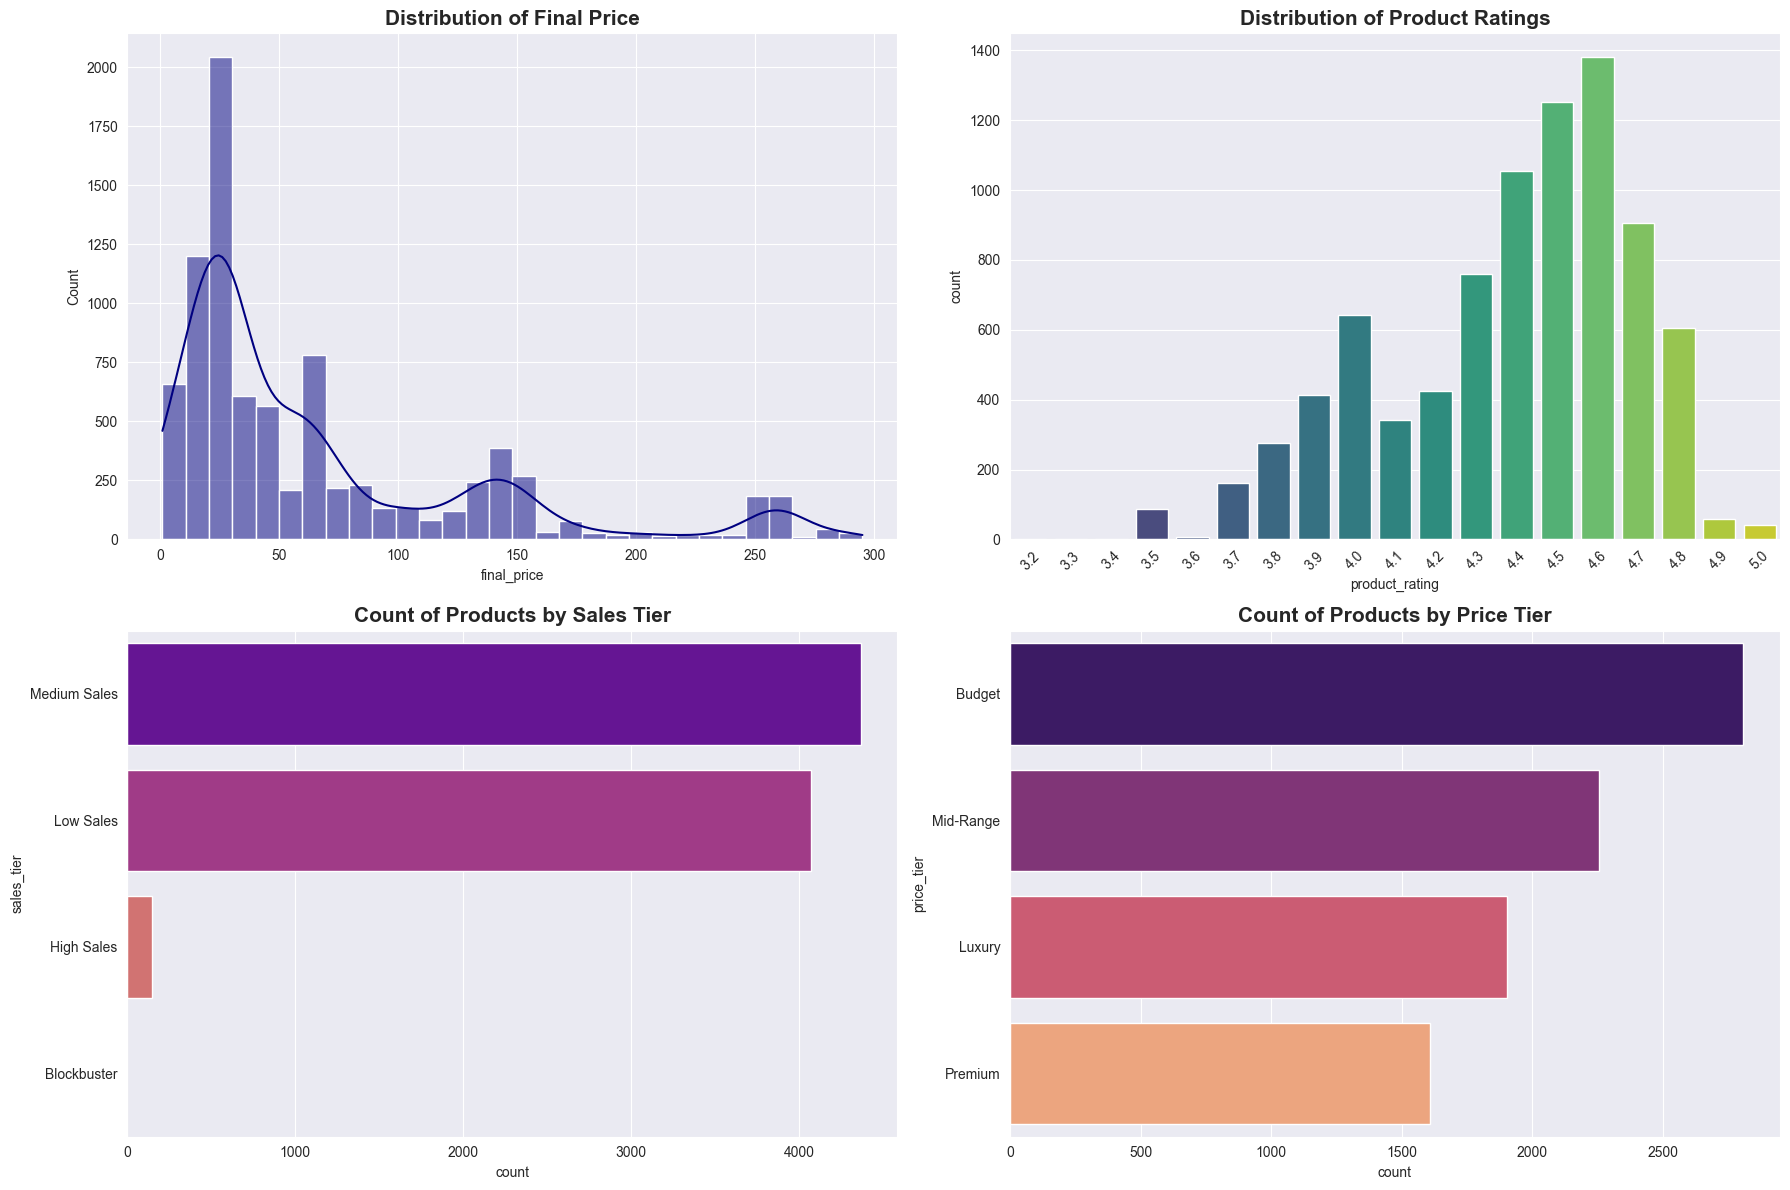

In [38]:
sns.set_style("darkgrid")
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.histplot(df_cleaned['final_price'], kde=True, bins=30, color='navy')
plt.title('Distribution of Final Price', fontweight='bold', fontsize=15)

plt.subplot(2, 2, 2)
sns.countplot(x=df_cleaned['product_rating'].round(1), palette='viridis')
plt.title('Distribution of Product Ratings', fontweight='bold', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.countplot(y='sales_tier', data=df_cleaned, order=df_cleaned['sales_tier'].value_counts().index, palette='plasma')
plt.title('Count of Products by Sales Tier', fontweight='bold', fontsize=15)

plt.subplot(2, 2, 4)
sns.countplot(y='price_tier', data=df_cleaned, order=df_cleaned['price_tier'].value_counts().index, palette='magma')
plt.title('Count of Products by Price Tier', fontweight='bold', fontsize=15)

plt.tight_layout()
plt.show()

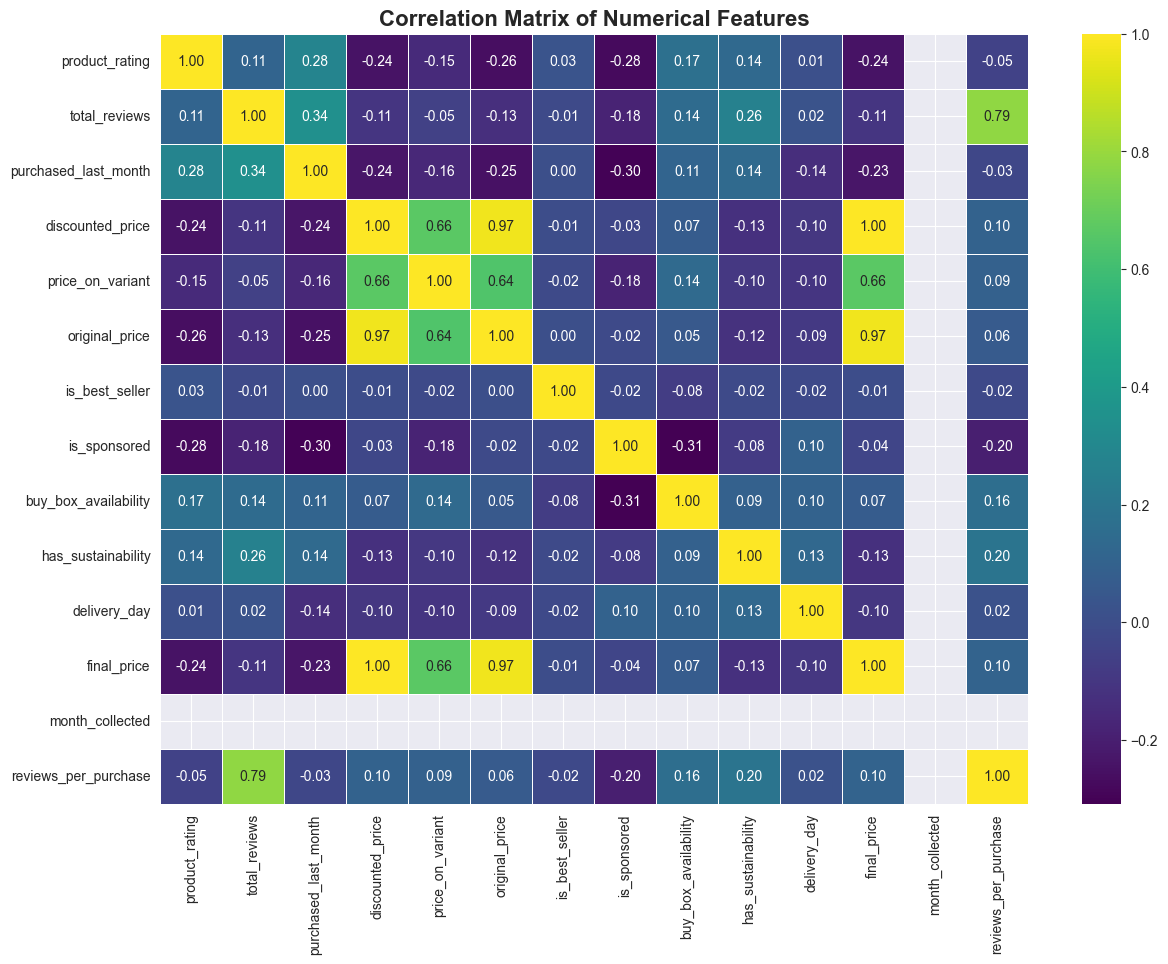

In [39]:
numeric_df = df_cleaned.select_dtypes(include=np.number)

plt.figure(figsize=(14, 10))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontweight='bold', fontsize=16)
plt.show()

**Feature Engineering Based on HeatMap**

Discount Based Feature

In [40]:
epsilon = 1e-6
df['discount_depth'] = (df['original_price'] - df['final_price']) / (df['original_price'] + epsilon)
df['discount_amount'] = df['original_price'] - df['final_price']
df['discount_depth'] = df['discount_depth'].clip(0, 1)

df[['original_price', 'final_price', 'discount_amount', 'discount_depth']].head()

,original_price,final_price,discount_amount,discount_depth
0,159.00,76.228,82.772,0.520579
1,15.99,9.990,6.000,0.375234
2,349.00,314.000,35.000,0.100287
20,19.98,16.950,3.030,0.151652
22,14.33,9.890,4.440,0.309839


Engagement Quality Feature

In [41]:
df['engagement_quality'] = df['product_rating'] * (df['reviews_per_purchase'] + 0.1)

df[['product_rating', 'reviews_per_purchase', 'engagement_quality']].head()

,product_rating,reviews_per_purchase,engagement_quality
0,4.6,1.25000,6.210000
1,4.3,0.40950,2.190850
2,4.6,1.52200,7.461200
20,4.8,0.61157,3.415536
22,4.8,0.54244,3.083712


Drop the rows where they have been feature engineerd

In [42]:
df_final_engineered = df.drop(columns=[
    'original_price', 
    'discounted_price', 
    'price_on_variant'
])

In [43]:
df.head()

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,price_on_variant,original_price,is_best_seller,is_sponsored,buy_box_availability,...,collected_time,delivery_day,final_price,price_tier,month_collected,sales_tier,reviews_per_purchase,discount_depth,discount_amount,engagement_quality
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375,300,89.68,2.40,159.00,0,1,1,...,11:14:29,1.0,76.228,Premium,8,Medium Sales,1.25000,0.520579,82.772,6.210000
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457,6000,9.99,0.00,15.99,0,1,1,...,11:14:29,29.0,9.990,Budget,8,Blockbuster,0.40950,0.375234,6.000,2.190850
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044,2000,314.00,0.00,349.00,0,1,1,...,11:14:29,1.0,314.000,Luxury,8,High Sales,1.52200,0.100287,35.000,7.461200
20,"Energizer AA Batteries Alkaline Power, 32 Coun...",4.8,61157,100000,16.95,16.78,19.98,0,0,1,...,11:14:29,29.0,16.950,Budget,8,Blockbuster,0.61157,0.151652,3.030,3.415536
22,"Amazon Basics Wood-Cased #2 Pencils, Pre-sharp...",4.8,54244,100000,9.89,8.87,14.33,0,0,1,...,11:14:29,29.0,9.890,Budget,8,Blockbuster,0.54244,0.309839,4.440,3.083712


/var/folders/35/h2vzj0092n76sg7z3vjwcv3r0000gn/T/ipykernel_47567/2921566476.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


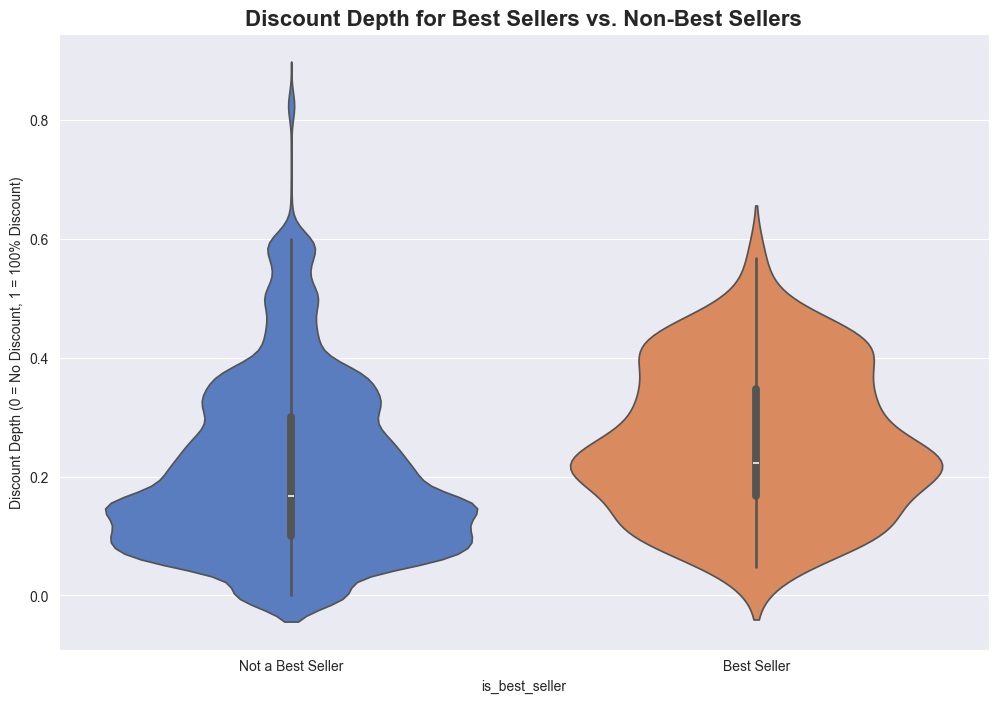

In [44]:
plt.figure(figsize=(12, 8))
sns.violinplot(
    x='is_best_seller', 
    y='discount_depth', 
    data=df_final_engineered, 
    palette='muted'
)
plt.title('Discount Depth for Best Sellers vs. Non-Best Sellers', fontsize=16, fontweight='bold')
plt.ylabel('Discount Depth (0 = No Discount, 1 = 100% Discount)')
plt.xticks([0, 1], ['Not a Best Seller', 'Best Seller'])
plt.show()

/var/folders/35/h2vzj0092n76sg7z3vjwcv3r0000gn/T/ipykernel_47567/1760891207.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tier_engagement = df_final_engineered.groupby('sales_tier')['engagement_quality'].mean().sort_values(ascending=False)
/var/folders/35/h2vzj0092n76sg7z3vjwcv3r0000gn/T/ipykernel_47567/1760891207.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


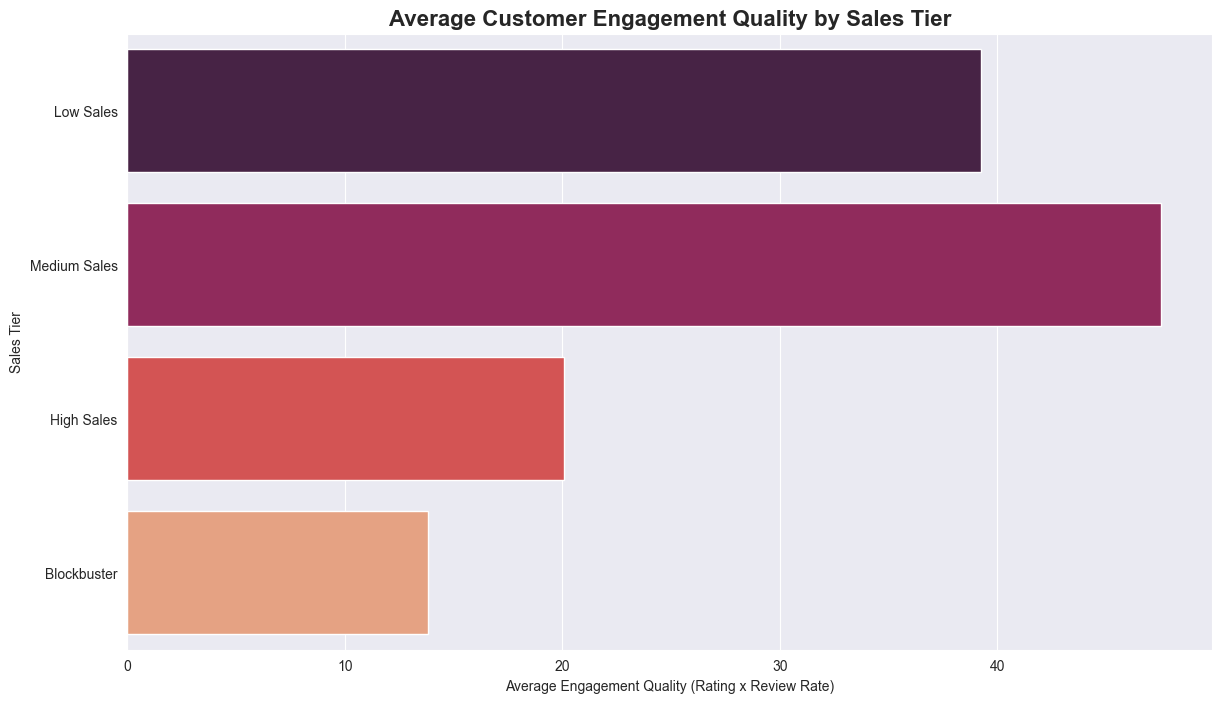

In [45]:
tier_engagement = df_final_engineered.groupby('sales_tier')['engagement_quality'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(
    x=tier_engagement.values, 
    y=tier_engagement.index, 
    palette='rocket'
)
plt.title('Average Customer Engagement Quality by Sales Tier', fontsize=16, fontweight='bold')
plt.xlabel('Average Engagement Quality (Rating x Review Rate)')
plt.ylabel('Sales Tier')
plt.show()

/var/folders/35/h2vzj0092n76sg7z3vjwcv3r0000gn/T/ipykernel_47567/3037532942.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_engagement = df_final_engineered.groupby('price_tier')['engagement_quality'].mean().sort_values(ascending=False)
/var/folders/35/h2vzj0092n76sg7z3vjwcv3r0000gn/T/ipykernel_47567/3037532942.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


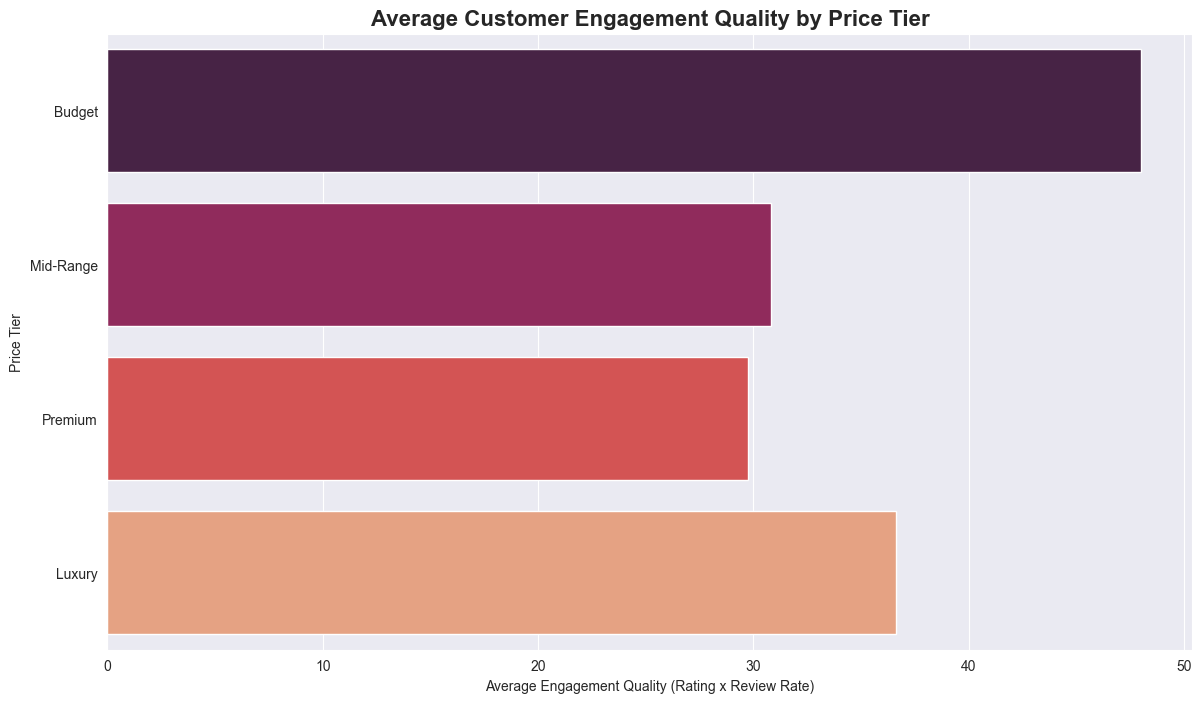

In [46]:
category_engagement = df_final_engineered.groupby('price_tier')['engagement_quality'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(
    x=category_engagement.values, 
    y=category_engagement.index, 
    palette='rocket'
)
plt.title('Average Customer Engagement Quality by Price Tier', fontsize=16, fontweight='bold')
plt.xlabel('Average Engagement Quality (Rating x Review Rate)')
plt.ylabel('Price Tier')
plt.show()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12311 entries, 0 to 42674
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   product_title         12311 non-null  object  
 1   product_rating        12140 non-null  float64 
 2   total_reviews         12311 non-null  int64   
 3   purchased_last_month  12311 non-null  int64   
 4   discounted_price      12311 non-null  float64 
 5   price_on_variant      12311 non-null  float64 
 6   original_price        12311 non-null  float64 
 7   is_best_seller        12311 non-null  int64   
 8   is_sponsored          12311 non-null  int64   
 9   buy_box_availability  12311 non-null  int64   
 10  has_sustainability    12311 non-null  int64   
 11  collected_date        12311 non-null  object  
 12  collected_time        12311 non-null  object  
 13  delivery_day          12275 non-null  float64 
 14  final_price           12311 non-null  float64 
 15  price_t

In [48]:
df.head(20)

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,price_on_variant,original_price,is_best_seller,is_sponsored,buy_box_availability,...,collected_time,delivery_day,final_price,price_tier,month_collected,sales_tier,reviews_per_purchase,discount_depth,discount_amount,engagement_quality
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375,300,89.68,2.40,159.00,0,1,1,...,11:14:29,1.0,76.228,Premium,8,Medium Sales,1.250000,0.520579,82.772,6.210000
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457,6000,9.99,0.00,15.99,0,1,1,...,11:14:29,29.0,9.990,Budget,8,Blockbuster,0.409500,0.375234,6.000,2.190850
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044,2000,314.00,0.00,349.00,0,1,1,...,11:14:29,1.0,314.000,Luxury,8,High Sales,1.522000,0.100287,35.000,7.461200
20,"Energizer AA Batteries Alkaline Power, 32 Coun...",4.8,61157,100000,16.95,16.78,19.98,0,0,1,...,11:14:29,29.0,16.950,Budget,8,Blockbuster,0.611570,0.151652,3.030,3.415536
22,"Amazon Basics Wood-Cased #2 Pencils, Pre-sharp...",4.8,54244,100000,9.89,8.87,14.33,0,0,1,...,11:14:29,29.0,9.890,Budget,8,Blockbuster,0.542440,0.309839,4.440,3.083712
25,"Energizer Alkaline Power AAA Batteries, 32 Cou...",4.8,43002,70000,15.15,14.77,17.99,0,0,1,...,11:14:29,29.0,15.150,Budget,8,Blockbuster,0.614314,0.157865,2.840,3.428709
26,Duracell Coppertop AA Batteries with Power Boo...,4.8,125404,80000,18.79,24.00,21.89,0,0,1,...,11:14:29,29.0,18.790,Budget,8,Blockbuster,1.567550,0.141617,3.100,8.004240
33,Texas Instruments TI-30XS MultiView Scientific...,4.8,36122,70000,16.99,9.99,20.00,0,0,1,...,11:14:46,29.0,16.990,Budget,8,Blockbuster,0.516029,0.150500,3.010,2.956937
35,Mounting Dream TV Wall Mount for 32-65 Inch Te...,4.8,44109,10000,39.97,0.00,48.99,1,0,1,...,11:14:46,29.0,39.970,Mid-Range,8,Blockbuster,4.410900,0.184119,9.020,21.652320
37,Scotch Heavy Duty Shipping and Moving Packing ...,4.8,103375,10000,13.86,13.78,19.99,1,0,1,...,11:14:46,29.0,13.860,Budget,8,Blockbuster,10.337500,0.306653,6.130,50.100000


In [50]:
df_final = df.copy()

**MODELS**

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
df_final['product_rating'].fillna(df_final['product_rating'].median(), inplace=True)
df_final['engagement_quality'].fillna(df_final['engagement_quality'].median(), inplace=True)

print("Missing values after filling:")
print(df_final.isnull().sum()[df_final.isnull().sum() > 0])

Missing values after filling:
delivery_day    36
dtype: int64


/var/folders/35/h2vzj0092n76sg7z3vjwcv3r0000gn/T/ipykernel_47567/715482281.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['product_rating'].fillna(df_final['product_rating'].median(), inplace=True)
/var/folders/35/h2vzj0092n76sg7z3vjwcv3r0000gn/T/ipykernel_47567/715482281.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

In [55]:
y = df_cleaned['final_price']
X = df_cleaned.drop(columns=[
    'final_price', 'product_title', 'collected_date', 
    'collected_time', 'original_price', 'discounted_price', 
    'price_on_variant'
], errors='ignore')

In [56]:
X = pd.get_dummies(X, columns=['price_tier', 'sales_tier'], drop_first=True)
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
scaler = StandardScaler()

In [74]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [75]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [58]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"\nFeature columns ({len(X.columns)}):")

X_train shape: (6862, 16)
X_test shape: (1716, 16)
y_train shape: (6862,)
y_test shape: (1716,)

Feature columns (16):


In [76]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [78]:
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

In [79]:
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"R-squared (R²): {r2_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f}")

R-squared (R²): 0.8387
Root Mean Squared Error (RMSE): 26.3818


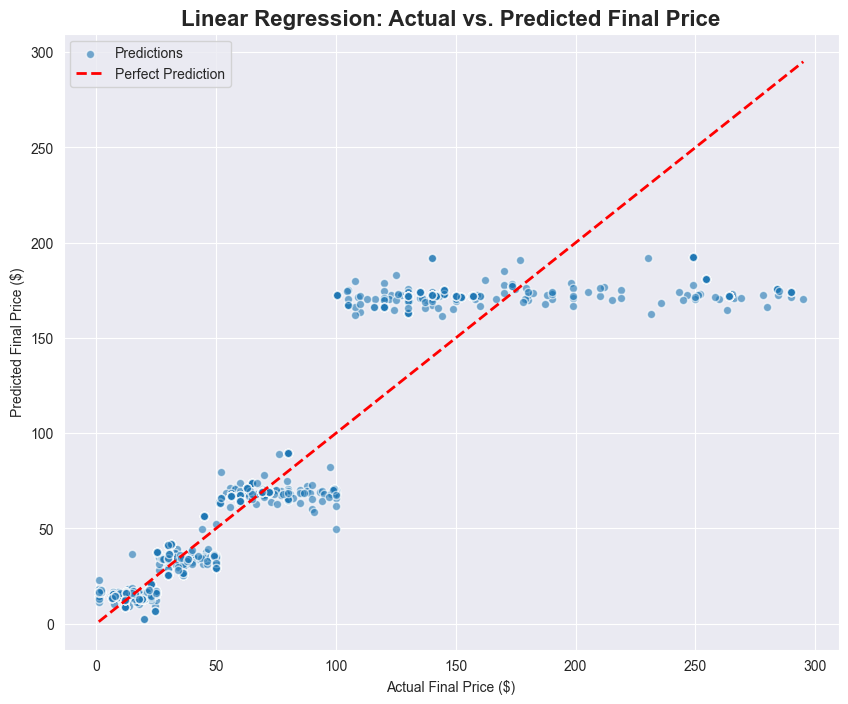

In [80]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_lr, alpha=0.6, edgecolors='w', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.title('Linear Regression: Actual vs. Predicted Final Price', fontsize=16, fontweight='bold')
plt.xlabel('Actual Final Price ($)')
plt.ylabel('Predicted Final Price ($)')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [82]:
print(f"R-squared (R²): {r2_score(y_test, y_pred_ridge):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.4f}")

R-squared (R²): 0.8387
RMSE: 26.3820


In [83]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

In [84]:
print(f"R-squared (R²): {r2_score(y_test, y_pred_lasso):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.4f}")

R-squared (R²): 0.8336
RMSE: 26.7990


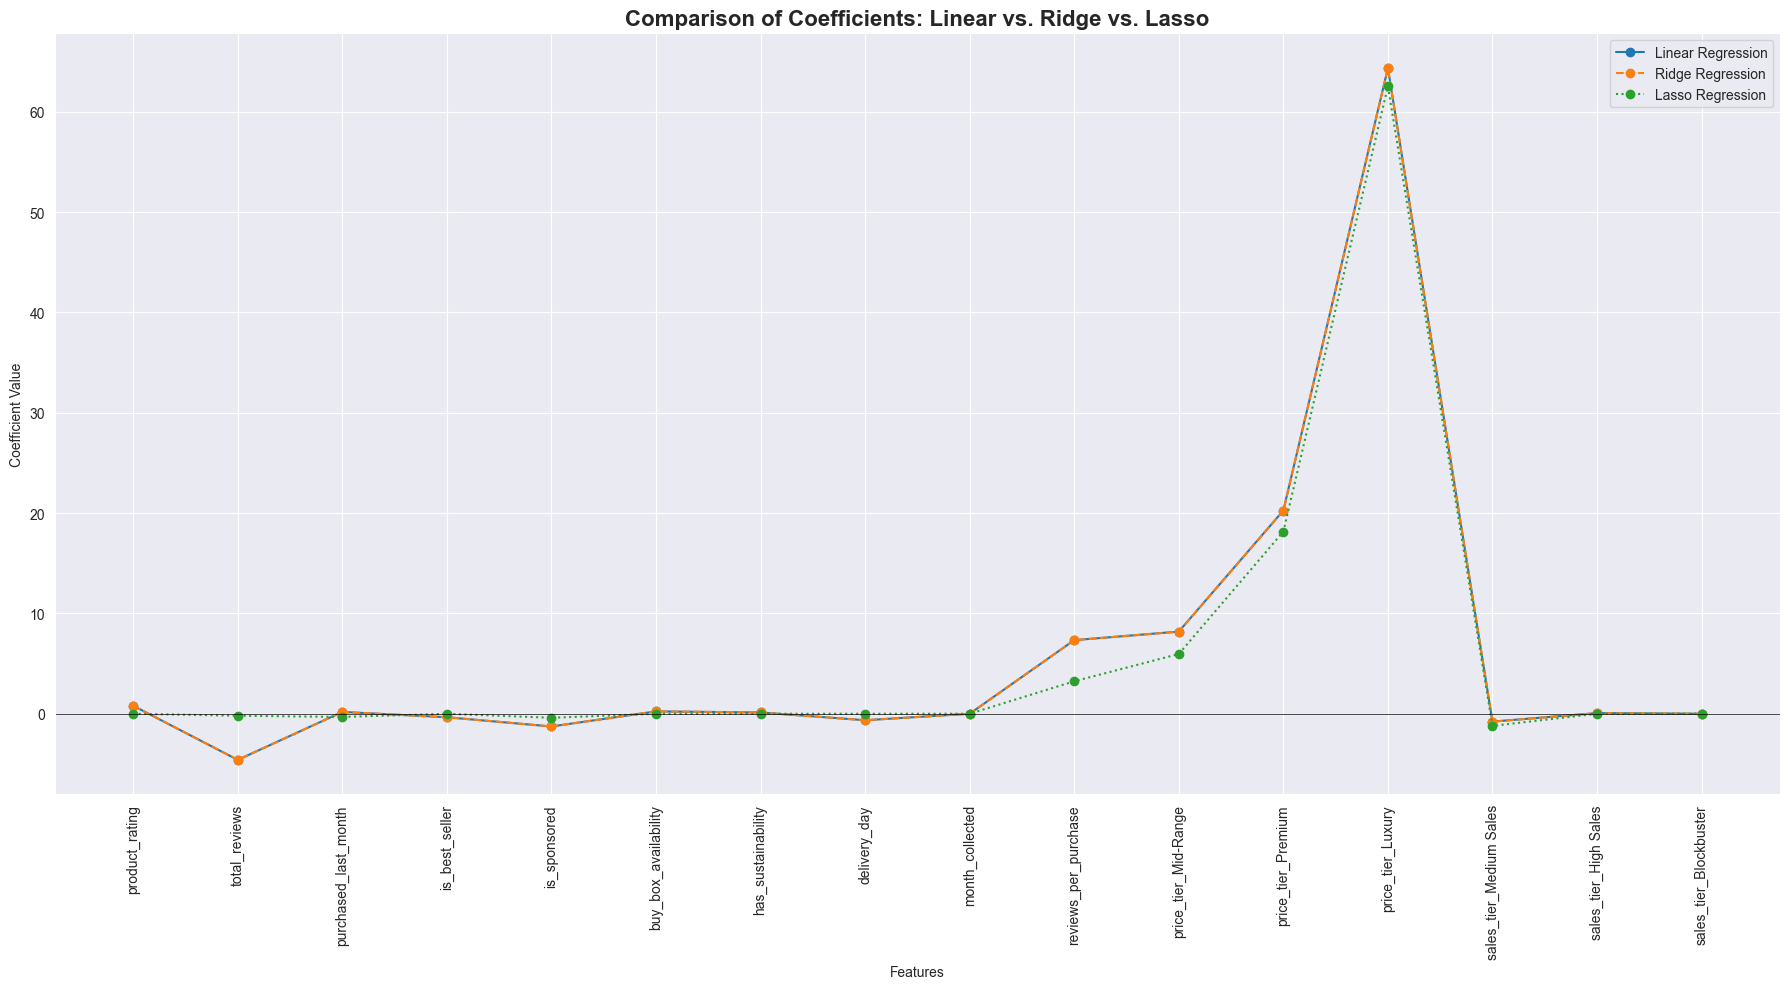

In [85]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Linear Regression': lr_model.coef_,
    'Ridge Regression': ridge_model.coef_,
    'Lasso Regression': lasso_model.coef_
})

plt.figure(figsize=(18, 10))

plt.plot(coefficients['Feature'], coefficients['Linear Regression'], marker='o', linestyle='-', label='Linear Regression')
plt.plot(coefficients['Feature'], coefficients['Ridge Regression'], marker='o', linestyle='--', label='Ridge Regression')
plt.plot(coefficients['Feature'], coefficients['Lasso Regression'], marker='o', linestyle=':', label='Lasso Regression')

plt.title('Comparison of Coefficients: Linear vs. Ridge vs. Lasso', fontsize=16, fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5) 
plt.tight_layout()
plt.show()